fsb_state: [1, 0, 1, 0, 0, 0]
driver_bit_stirng:
 [[-1.  1. -1.  1.  0.  0.]
 [ 1.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  1.]]
algorithm_optimization_method: commute
AerSimulator
'circuit_commute' function ran once
<function QiskitCircuit.get_circuit_cost_function.<locals>.circuit_cost_function at 0x7f2c774fca60>
test_max_prob: 59.28%, test_max_prob_state: [1, 0, 1, 0, 0, 0]
test_max_prob: 59.28%, test_max_prob_state: [1, 0, 1, 0, 0, 0]


 51%|█████▏    | 77/150 [00:06<00:06, 11.90it/s, cost=13]  


Early stopping: Loss change is below threshold.
====
[18.0205078125, 16.13671875, 14.455078125, 13.458984375, 13.046875, 13.0712890625, 13.48046875, 13.876953125, 14.2236328125, 14.3154296875, 14.28125, 14.0732421875, 13.72265625, 13.4638671875, 13.2646484375, 13.0576171875, 13.0, 13.0576171875, 13.1845703125, 13.3583984375, 13.41015625, 13.443359375, 13.4453125, 13.41015625, 13.396484375, 13.3251953125, 13.1845703125, 13.0712890625, 13.013671875, 13.0, 13.046875, 13.0576171875, 13.087890625, 13.1181640625, 13.1181640625, 13.0712890625, 13.0576171875, 13.0634765625, 13.013671875, 13.0, 13.0, 13.013671875, 13.046875, 13.0576171875, 13.0576171875, 13.0576171875, 13.0576171875, 13.0576171875, 13.0634765625, 13.046875, 13.0166015625, 13.0, 13.0, 13.0166015625, 13.013671875, 13.013671875, 13.013671875, 13.0166015625, 13.0, 13.0, 13.0, 13.0166015625, 13.013671875, 13.0166015625, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0166015625, 13.0166015625, 13.0, 13.0, 13.0, 13.0, 13.0, 13.0]


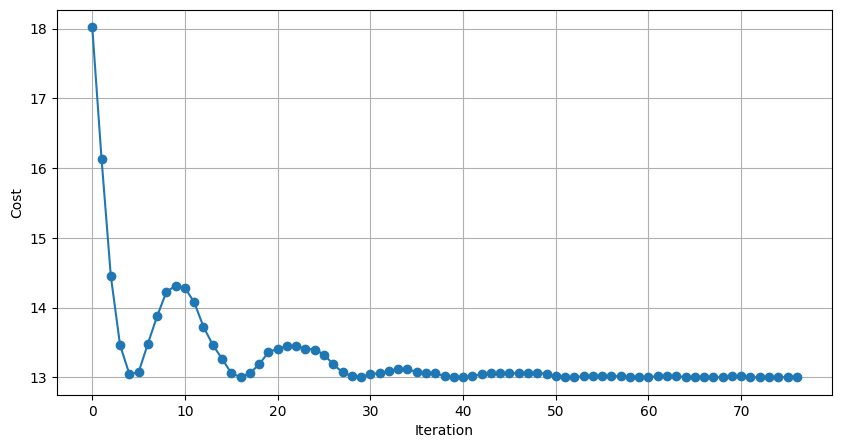

iteration_count: 76
best_params: [3.1343 4.5259]
best_cost: 13.0
[1, 0, 1, 0, 0, 0]: 13 - 1.0
max_prob_solution: [1, 0, 1, 0, 0, 0], cost: 13, max_prob: 100.00%
best_solution_probs: 100.0
mean_cost: 13.0
in_constraint_probs: 100.0
ARG: 0.0
(0.0, 100.0, 100.0, 76)


In [2]:
should_print = True
import random
from quBLP.problemtemplate import FacilityLocationProblem as FLP
from quBLP.problemtemplate import GraphColoringProblem as GCP
from quBLP.problemtemplate import KPartitionProblem as KPP
from quBLP.models import CircuitOption, OptimizerOption
from quBLP.models import ConstrainedBinaryOptimization
from quBLP.analysis import generater
import numpy as np

random.seed(0x7ff)
np.random.seed(0x1)

optimizer_option = OptimizerOption(
    params_optimization_method='Adam',
    max_iter=150,
    opt_id='commute',
)
circuit_option = CircuitOption(
    num_layers=1,
    need_draw=False,
    use_decompose=True,
    mcx_mode='constant',
    circuit_type='qiskit',
    # backend='ibm_osaka',  # 'FakeQuebec' # 'AerSimulator'
    backend='AerSimulator',  # FakeKyiv, FakeTorino, FakeBrisbane
    # feedback=['depth', 'culled_depth', 'latency', 'width'],
    # feedback=['depth', 'culled_depth', 'transpile_time', 'rss_usage'],
    # IBM=True,
)
methods = ['penalty', 'cyclic', 'commute', 'HEA']
raw_depth = [[] for _ in range(len(methods))]
depth_without_one_qubit_gate = [[] for _ in range(len(methods))]
# latency = [[] for _ in range(len(methods))]
flp_problems, flp_configs = generater.generate_flp(1, [(1, 2), (2, 3), (3, 3), (3, 4)], 1, 20)
gcp_problems, gcp_configs = generater.generate_gcp(0, [(3, 1), (3, 2), (4, 2), (4, 3)])
# kpp_problems, kpp_configs = generater.generate_kpp(1, [(4, [2, 2], 3), (6, [2, 2, 2], 5), (8, [2, 2, 4], 7), (9, [3, 3, 3], 8)], 1, 20)
# kpp_problems, kpp_configs = generater.generate_kpp(1, [(4, [2, 2], 3), (6, [2, 2, 2], 5), (8, [2, 2, 4], 7), (9, [3, 3, 3], 8)], 1, 20)
kpp_problems, kpp_configs = generater.generate_kpp(0, [(4, 2, 3), (6, 3, 5), (8, 3, 7), (9, 3, 8)], 1, 20)

problems_pkg = flp_problems + gcp_problems + kpp_problems
problems = [prb for problems in problems_pkg for prb in problems]

# all_configs = [flp_configs, gcp_configs, kpp_configs]
# problem_types = ["FLP", "GCP", "KPP"]

# for problem_type, configs in zip(problem_types, all_configs):
#     print(f"{problem_type} Configurations:")
#     for config in configs:
#         print(*config)
#     print()
prb : ConstrainedBinaryOptimization = problems[0]
prb.set_algorithm_optimization_method('commute', 400)
# print(prb.get_best_cost())
# print(flp.get_solution_bitstr())
# exit()
print(prb.optimize(optimizer_option, circuit_option))
# print(prb.dichotomy_optimize(optimizer_option, circuit_option, num_frozen_qubit=1))

# print(kpp_configs)